# 1 - Loading and Auto-process Data

In [1]:
from src.film_review_explorer import read_jsonl_to_dataframe
df = read_jsonl_to_dataframe("/Users/pipchang/Documents/VSC/Projects/DH-S/download/Top_Gun_Maverick")
df.sample(5)

,date,rating,rating_ratio,review,website,location,upvotes,total_votes,permalink,comments,like_ratio
6773,2022-06-05,10/10,1.0,That's what cinemas are made for !: One of my ...,IMDB,NaN,3.0,5.0,/review/rw8208935/?ref_=tt_urv,NaN,0.60000
4705,2022-05-28,3/10,0.3,The definition of mediocrity: I don't know how...,IMDB,NaN,48.0,118.0,/review/rw8181721/?ref_=tt_urv,NaN,0.40678
7650,2023-02-04,9/10,0.9,Definitely watchable even if you haven't watch...,IMDB,NaN,0.0,0.0,/review/rw8851719/?ref_=tt_urv,NaN,NaN
3279,2023-07-06,2/5,0.4,粗略看了一半，没什么意思。,Douban,新疆,0.0,NaN,NaN,NaN,NaN
4118,2022-06-26,8/10,0.8,Expertly navigated throwback thrill-ride: When...,IMDB,NaN,4.0,8.0,/review/rw8276643/?ref_=tt_urv,NaN,0.50000


In [2]:
from src.film_review_explorer import get_column_types
get_column_types(df)

{'date': 'Timestamp',
 'rating': 'NoneType, str',
 'rating_ratio': 'float',
 'review': 'str',
 'website': 'str',
 'location': 'NoneType, float, str',
 'upvotes': 'float',
 'total_votes': 'float',
 'permalink': 'float, str',
 'comments': 'float, list',
 'like_ratio': 'float'}

In [3]:
from src.film_review_explorer import auto_basic_process
auto_basic_process(df)
df.sample(5)

,date,rating,rating_ratio,review,website,location,upvotes,total_votes,permalink,comments,like_ratio,review_length,rating_level,like_level
1634,2022-05-21,4/5,0.8,前半部分节奏有点慢，但整体是好看的。全片最喜欢的高光时刻1是靓汤示范在规定时间内即完成任务，...,Douban,,15.0,NaN,NaN,NaN,NaN,143,Good (>=8/10),None
6765,2022-06-28,10/10,1.0,Loved it: Best sequel ever made! Loved the res...,IMDB,NaN,2.0,4.0,/review/rw8282205/?ref_=tt_urv,NaN,0.5,54,Good (>=8/10),Somewhat Disgree (20%~50%)
3040,2022-12-29,4/5,0.8,1⃣️热血澎湃，太有诚意的续作！如果能在大屏幕看我肯定超满足。2⃣️其实很老套，价值观还在上...,Douban,上海,1.0,NaN,NaN,NaN,NaN,224,Good (>=8/10),None
1138,2022-11-14,2/5,0.4,已经老了！,Douban,浙江,0.0,NaN,NaN,NaN,NaN,5,Bad (<=4/10),None
7165,2022-06-06,10/10,1.0,As good as the original: I enjoyed this sequel...,IMDB,NaN,1.0,2.0,/review/rw8210717/?ref_=tt_urv,NaN,0.5,45,Good (>=8/10),Somewhat Disgree (20%~50%)


# 2 - Basic Inspection with Plotting

In [4]:
%matplotlib widget

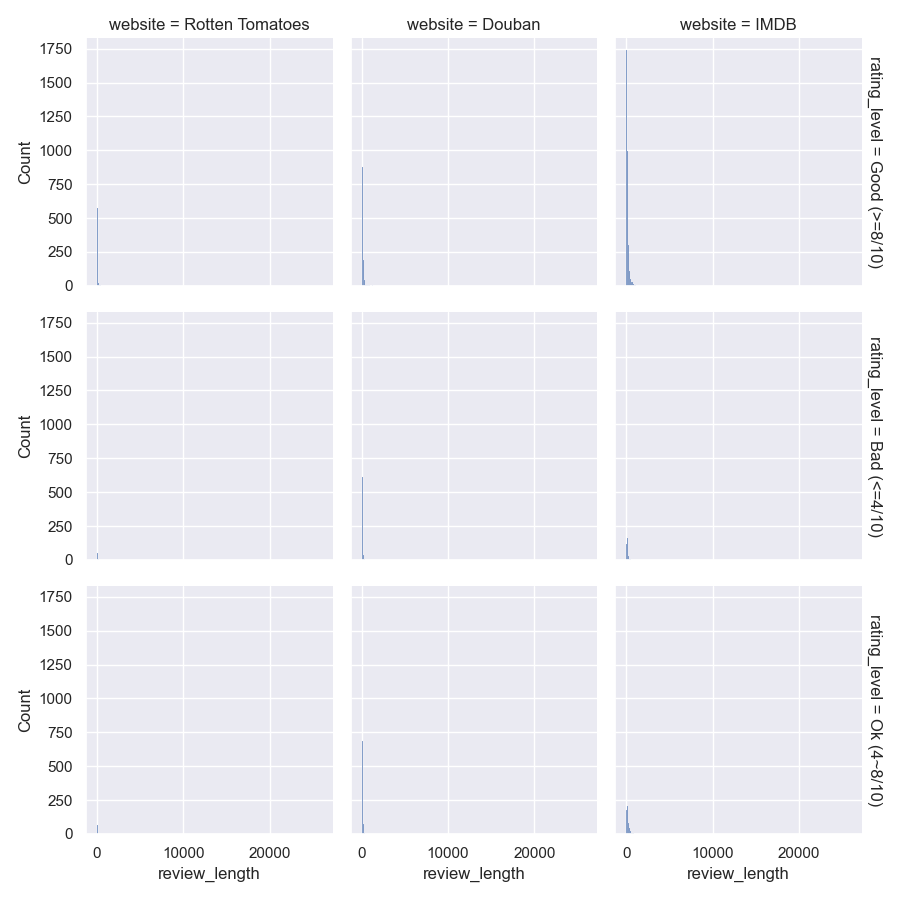

In [47]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.displot(
    df, x="review_length", col="website", row="rating_level",
    binwidth=100, height=3, facet_kws=dict(margin_titles=True),
)

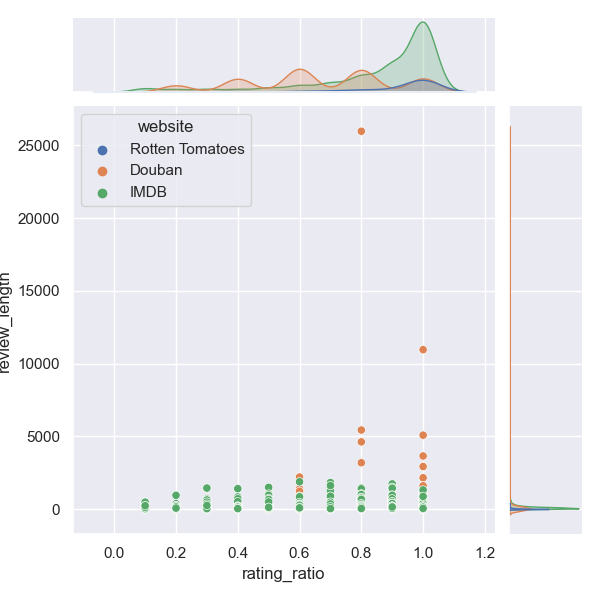

In [48]:
sns.jointplot(df, x="rating_ratio", y="review_length", hue="website")

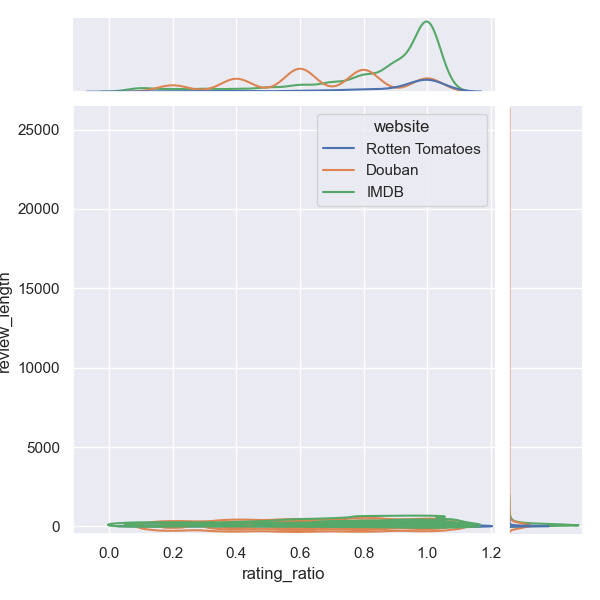

In [49]:
sns.jointplot(df, x="rating_ratio", y="review_length", hue="website", kind="kde")

# 3 - Creating Sub Dataframes

In [33]:
sub_df = df.query("website == 'IMDB'")
sub_df

,date,rating,rating_ratio,review,website,location,upvotes,total_votes,permalink,comments,like_ratio,review_length,rating_level,like_level
3468,2022-05-23,10/10,1.0,The truly epic blockbuster we needed.: Wow. Th...,IMDB,NaN,2647.0,2984.0,/review/rw8168012/?ref_=tt_urv,NaN,0.887064,246,Good (>=8/10),Mostly Agree (>80%)
3469,2022-05-26,10/10,1.0,This is slightly different to the other review...,IMDB,NaN,5140.0,5406.0,/review/rw8177338/?ref_=tt_urv,NaN,0.950795,231,Good (>=8/10),Mostly Agree (>80%)
3470,2022-05-25,10/10,1.0,Best Sequel yet: In one of the more memorable ...,IMDB,NaN,1151.0,1355.0,/review/rw8173679/?ref_=tt_urv,NaN,0.849446,415,Good (>=8/10),Mostly Agree (>80%)
3471,2022-05-27,10/10,1.0,This is why we go to the movies: This is one s...,IMDB,NaN,927.0,1089.0,/review/rw8178255/?ref_=tt_urv,NaN,0.851240,326,Good (>=8/10),Mostly Agree (>80%)
3472,2022-05-26,10/10,1.0,Let me just say.: I was reluctantly dragged in...,IMDB,NaN,1780.0,1969.0,/review/rw8177954/?ref_=tt_urv,NaN,0.904012,65,Good (>=8/10),Mostly Agree (>80%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,2022-05-27,9/10,0.9,"A pleasant surprise: Got to say, it was a plea...",IMDB,NaN,0.0,0.0,/review/rw8180643/?ref_=tt_urv,NaN,NaN,154,Good (>=8/10),None
7687,2022-05-29,10/10,1.0,Finally The Summer Blockbuster we all needed.:...,IMDB,NaN,0.0,2.0,/review/rw8187177/?ref_=tt_urv,NaN,0.000000,161,Good (>=8/10),Mostly Disagree (<20%)
7688,2022-06-02,8/10,0.8,"8,5, care big spoilers in few words: Wish some...",IMDB,NaN,0.0,3.0,/review/rw8196114/?ref_=tt_urv,NaN,0.000000,46,Good (>=8/10),Mostly Disagree (<20%)
7689,2022-09-07,10/10,1.0,MY NEW FAVORITE FILM !: I have seen it 6 times...,IMDB,NaN,0.0,1.0,/review/rw8522405/?ref_=tt_urv,NaN,0.000000,137,Good (>=8/10),Mostly Disagree (<20%)


# 4 - Text Processing with Spacy

In [34]:
from src.film_review_explorer import auto_nlp_process
from src.film_review_explorer import TextProcessor

processor = TextProcessor("en_core_web_sm")

auto_nlp_process(sub_df, processor, language='en')
sub_df.sample(5)

/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokens"],
/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["entities"],
/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,date,rating,rating_ratio,review,website,location,upvotes,total_votes,permalink,comments,like_ratio,review_length,rating_level,like_level,tokens,entities,bigrams,trigrams,quadgrams
7238,2022-06-04,6/10,0.6,Mediocre Recruitment Flick with Good Final Fli...,IMDB,NaN,1.0,19.0,/review/rw8204971/?ref_=tt_urv,NaN,0.052632,81,Ok (4~8/10),Mostly Disagree (<20%),"[Mediocre, Recruitment, Flick, Good, Final, Fl...","[Mediocre Recruitment Flick, navy]","[Mediocre Recruitment, Recruitment Flick, Good...","[Mediocre Recruitment Flick, Good Final Flight...","[Good Final Flight Sequence, great final fligh..."
6313,2022-05-28,9/10,0.9,Intense action and emotional story: This movie...,IMDB,NaN,1.0,1.0,/review/rw8183064/?ref_=tt_urv,NaN,1.000000,96,Good (>=8/10),Mostly Agree (>80%),"[intense, action, emotional, story, movie, sur...","[One, the past two years]","[Intense action, emotional story, surprisingly...","[better movies release, confusing like usually...",[action scenes felt like]
6355,2022-06-10,7/10,0.7,Let's be Honest.: It was well done and the act...,IMDB,NaN,0.0,2.0,/review/rw8222101/?ref_=tt_urv,NaN,0.000000,69,Ok (4~8/10),Mostly Disagree (<20%),"[let, honest, action, scene, exceptional, clos...","[Honest, James Bond, 100]","[action scenes, characters interchangeable, ev...",[Mission Impossible series],[]
5327,2022-07-26,10/10,1.0,Great old movie: Really enjoyed it. A couple o...,IMDB,NaN,4.0,10.0,/review/rw8373179/?ref_=tt_urv,NaN,0.400000,45,Good (>=8/10),Somewhat Disgree (20%~50%),"[great, old, movie, enjoy, couple, hole, forgi...",[],"[Great old, old movie, big screen, screen movi...","[Great old movie, big screen movie]",[]
5141,2022-07-26,3/10,0.3,Ground Tom Cruise: Someone needs to ground Tom...,IMDB,NaN,6.0,20.0,/review/rw8371099/?ref_=tt_urv,NaN,0.300000,75,Bad (<=4/10),Somewhat Disgree (20%~50%),"[Ground, Tom, Cruise, need, ground, Tom, Cruis...","[Ground Tom Cruise, Tom Cruise, first, the fir...","[Ground Tom, Tom Cruise, ground Tom, Tom Cruis...","[Ground Tom Cruise, ground Tom Cruise, nostalg...",[]


In [35]:
from src.film_review_explorer import create_tfidf_df

tfidf_df = create_tfidf_df(sub_df)
tfidf_df

/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df["idf"] = np.log(len(df) / idf_df["df"]) + 0.1


,tf,df,idf,tfidf
object,,,,
movie,9687,3180,0.383665,3716.558778
film,4192,1586,1.079331,4524.554096
good,3874,2198,0.752998,2917.113942
Gun,2956,1510,1.128436,3335.657186
Maverick,2718,1231,1.332719,3622.330048
...,...,...,...,...
ravish,2,2,7.755154,15.510308
grate,2,2,7.755154,15.510308
advisor,2,2,7.755154,15.510308


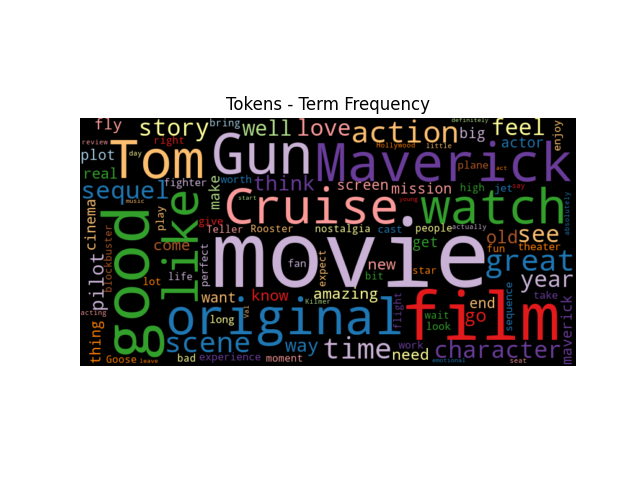

In [37]:
from src.film_review_explorer import wordcloud

wordcloud(tfidf_df['tf'], title='Tokens - Term Frequency', language = 'en')


/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df["idf"] = np.log(len(df) / idf_df["df"]) + 0.1
/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df["idf"] = np.log(len(df) / idf_df["df"]) + 0.1
/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:202:

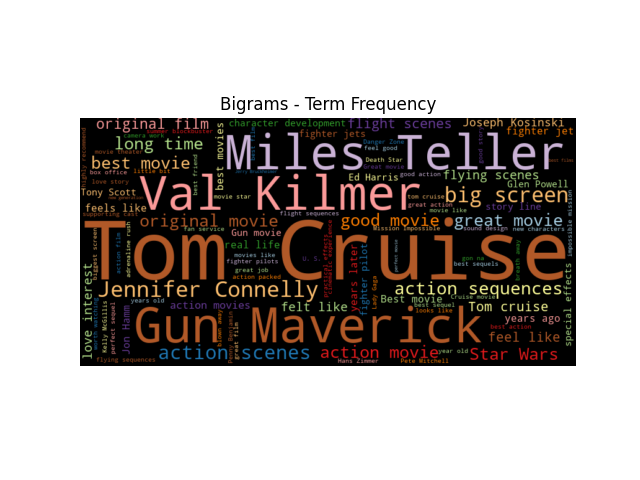

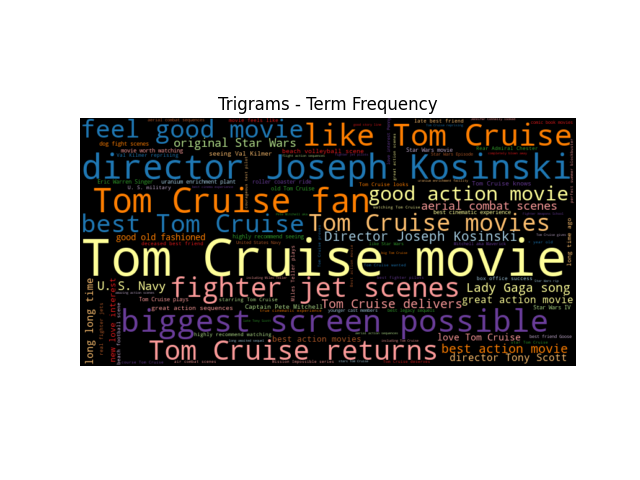

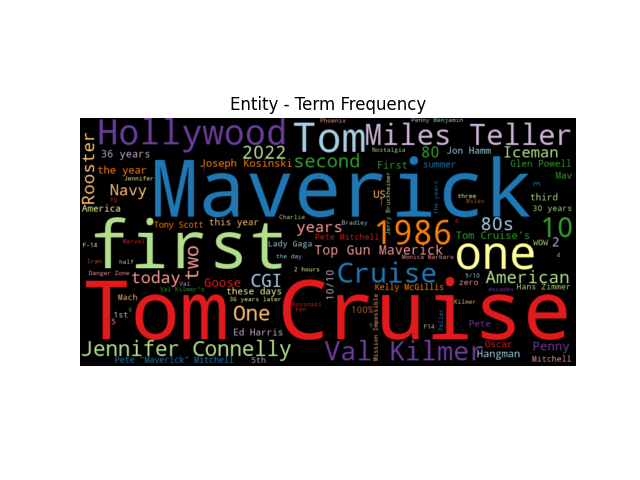

In [38]:
bigram_tfidf = create_tfidf_df(sub_df, column='bigrams')
trigram_tfidf = create_tfidf_df(sub_df, column='trigrams')
entity_tfidf = create_tfidf_df(sub_df, column='entities')

wordcloud(bigram_tfidf['tf'], title='Bigrams - Term Frequency', language = 'en')
wordcloud(trigram_tfidf['tf'], title='Trigrams - Term Frequency', language = 'en')
wordcloud(entity_tfidf['tf'], title='Entity - Term Frequency', language = 'en')

/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df["idf"] = np.log(len(df) / idf_df["df"]) + 0.1
/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df["idf"] = np.log(len(df) / idf_df["df"]) + 0.1
/Users/pipchang/Documents/VSC/Projects/DH-L/DH_L/src/film_review_explorer/dataframe_preprocessor.py:202:

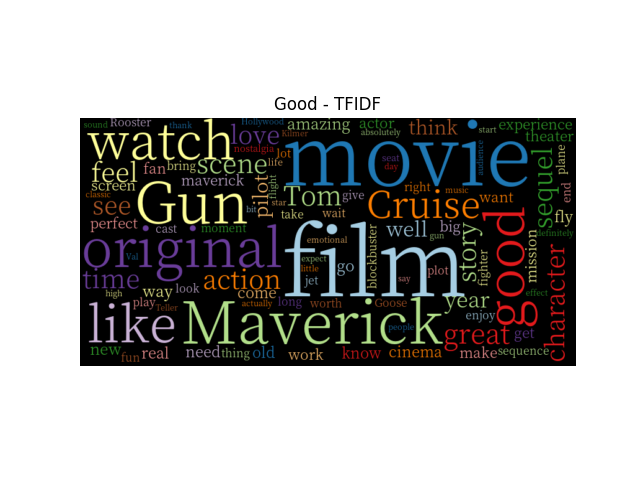

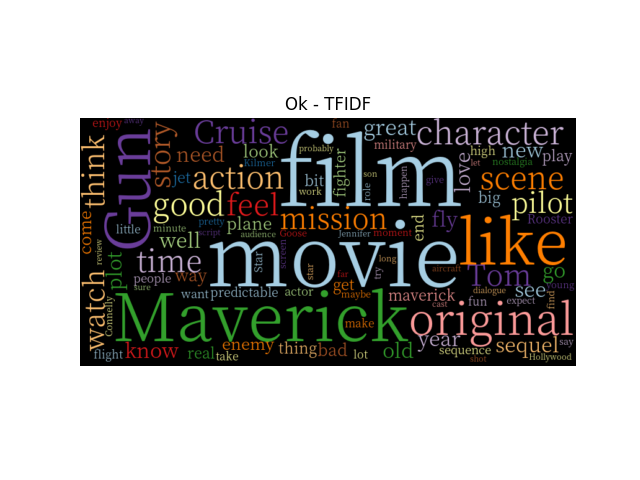

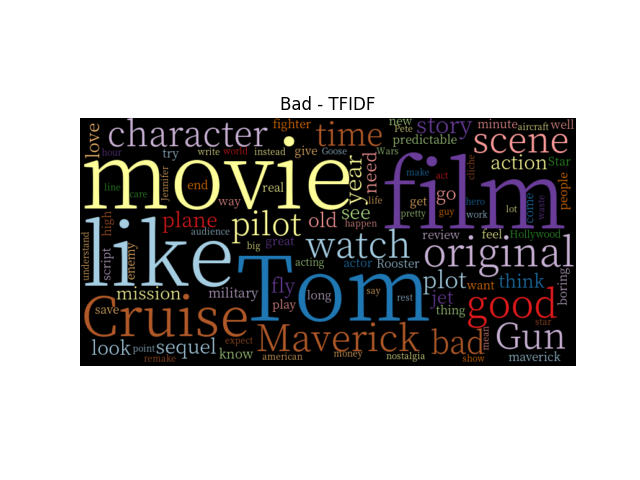

In [39]:
good_df = sub_df.query('rating_level == "Good (>=8/10)"')
ok_df = sub_df.query('rating_level == "Ok (4~8/10)"')
bad_df = sub_df.query('rating_level == "Bad (<=4/10)"')

good_tfidf = create_tfidf_df(good_df)
ok_tfidf = create_tfidf_df(ok_df)
bad_tfidf = create_tfidf_df(bad_df)

wordcloud(good_tfidf['tfidf'], title='Good - TFIDF', language = 'en')
wordcloud(ok_tfidf['tfidf'], title='Ok - TFIDF', language = 'en')
wordcloud(bad_tfidf['tfidf'], title='Bad - TFIDF', language = 'en')

In [41]:
from src.film_review_explorer import kwic

kwic(sub_df['review'], keyword='China', window=60)

20 random samples out of 27 contexts for 'China':
Who is the enemy?: No clear enemy. Is it Russia or  China ? No development of a enemy. just a mission. I found the mov
admy Award nominations/ wins for Cinematography and other te china l categories at the Oscars next year.
en all too easy for the script to put Maverick in the South  China  Sea defending Taiwan, or (could you imagine, given the timi
ng his shirt off all the time, running scenes, and Spy-Ex-Ma china  bull crap.9/10.
ventually rallies the USA to teach a Geopolitical lesson to  China . Where is Harry S. Truman's spirit in the 21st Century? It 
leased now, when Iran is not as much an enemy as Russia and  China  are, it shows how much the world has changed in three years
l Life counterpart to TOP GUN's target zone is North Korea,  China  knows that this warning shot is aimed directly at them, whi
things so safe, especially as it ended up getting banned in  China  anyway. As it stands, we are in a fantasy movie which in li
me

In [45]:
from src.film_review_explorer import count_keywords_by

keywords = ['patriotic', 'military', 'China', 'war', 'propaganda']
count_keywords_by(sub_df, by='rating_ratio', keywords=keywords)


,patriotic,military,China,war,propaganda
rating_ratio,,,,,
0.1,1,11,0,4,5
0.2,3,13,1,5,3
0.3,1,25,2,11,5
0.4,1,17,0,11,3
0.5,0,32,3,13,9
0.6,1,40,1,8,7
0.7,6,21,1,6,7
0.8,4,31,3,21,4
0.9,1,44,4,12,5
